<a href="https://colab.research.google.com/github/Esther-Zhou99/Data-Science/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import urllib.request
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [6]:
url_1 = "http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-t.txt"
file_1 = urllib.request.urlopen(url_1)

url_2 = "http://gutenberg.ca/ebooks/hemingwaye-menwithoutwomen/hemingwaye-menwithoutwomen-00-t.txt"
file_2 = urllib.request.urlopen(url_2)

url_3 = "http://gutenberg.ca/ebooks/hemingwaye-winnertakenothing/hemingwaye-winnertakenothing-00-t.txt"
file_3 = urllib.request.urlopen(url_3)

url_4 = "http://gutenberg.ca/ebooks/hemingwaye-greenhillsofafrica/hemingwaye-greenhillsofafrica-00-t.txt"
file_4 = urllib.request.urlopen(url_4)

url_5 = "http://gutenberg.ca/ebooks/hemingwaye-acrosstheriver/hemingwaye-acrosstheriver-00-t.txt"
file_5 = urllib.request.urlopen(url_5)

url_6 = "http://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-t.txt"
file_6 = urllib.request.urlopen(url_6)

files = [file_1, file_2, file_3, file_4, file_5, file_6]

In [7]:
ids = []
texts = []
id = 0
for file in files:
  doc_len = 0
  document_text = ""
  for line in file:
    formatted_string = str(line.strip())[1:]
    if len(formatted_string) < 20:
      continue
    document_text = document_text + formatted_string  
    doc_len = doc_len + 1
    if doc_len == 50:
      ids.append(id)
      texts.append(document_text)
      document_text = ""
      doc_len = 0

  id = id + 1

df = pd.DataFrame({'id': ids, 'text':texts})

In [8]:
df

,id,text
0,0,'* A Project Gutenberg Canada Ebook *''This eb...
1,0,'of inferiority and shyness he had felt on bei...
2,0,"'very forceful, and Cohn never had a chance of..."
3,0,"'""You forgot to get your paper,"" I said.''""Tha..."
4,0,"'""None of your exalted connections getting div..."
...,...,...
534,5,"""off. Who the hell are you? My conscience? Lis..."
535,5,'have killed me in the old days before they in...
536,5,'laughter and joking. One very tall and handso...
537,5,"""on to the ropes saying, 'I am going with B'wa..."


In [21]:
year_df = pd.DataFrame({'id':[0,1,2,3,4,5], 'year':[1926, 1927,1933,1935,1950,1952]})
year_df

,id,year
0,0,1926
1,1,1927
2,2,1950
3,3,1952
4,4,1933
5,5,1935


In [10]:
import re
# Remove punctuation
df['book_text_processed'] = df['text'].map(lambda x: re.sub('[\',.!?*]', '', str(x)))
# Convert the titles to lowercase
df['book_text_processed'] = df['book_text_processed'].replace(r'\n',' ', regex=True) 
df['book_text_processed'] = df['book_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: x.strip())
df.head()

,id,text,book_text_processed
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project gutenberg canada ebook this ebook is...
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and cohn never had a chance of n...
3,0,"'""You forgot to get your paper,"" I said.''""Tha...","""you forgot to get your paper"" i said""that\s s..."
4,0,"'""None of your exalted connections getting div...","""none of your exalted connections getting divo..."


In [11]:
df['book_text_processed'].iloc[0]

'a project gutenberg canada ebook this ebook is made available at no cost and with very fewrestrictions these restrictions apply only if (1) you makea change in the ebook (other than alteration for differentdisplay devices) or (2) you are making commercial use ofthe ebook if either of these conditions applies pleasecheck gutenbergca/links/licencehtml before proceedingthis work is in the canadian public domain but may beunder copyright in some countries if you live outside canada"check your countrys copyright laws if the book is under"copyright in your country do not downloador redistribute this filetitle: the sun also risesauthor: hemingway ernest (1899-1961)date of first publication: 1926edition used as base for this ebook:"new york: charles scribners sons"[undated but no earlier than 1954the date of the copyright renewal]date first posted: 4 july 2015date last updated: 4 july 2015project gutenberg canada ebook #1257this ebook was produced bymarcia brooks al haines paulina chin mark a

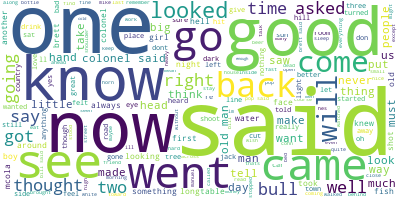

In [12]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['book_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# **K-means**

In [13]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [14]:
df

,id,text,book_text_processed
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project gutenberg canada ebook this ebook is...
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and cohn never had a chance of n...
3,0,"'""You forgot to get your paper,"" I said.''""Tha...","""you forgot to get your paper"" i said""that\s s..."
4,0,"'""None of your exalted connections getting div...","""none of your exalted connections getting divo..."
...,...,...,...
534,5,"""off. Who the hell are you? My conscience? Lis...","""off who the hell are you my conscience listen..."
535,5,'have killed me in the old days before they in...,have killed me in the old days before they inv...
536,5,'laughter and joking. One very tall and handso...,laughter and joking one very tall and handsome...
537,5,"""on to the ropes saying, 'I am going with B'wa...","""on to the ropes saying i am going with bwana""..."


In [15]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens] #ending ended -> end
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df['book_text_processed'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())

,1,100678,1030,1081thi,10part,11,1100,118of,12,1253thi,1257thi,1300,1302thi,1305,1335,1700,172part,17th,183260,1890\,1899,1899-1961,1905,1909,1918,1925,1926edit,1927,1927edit,1929,1933edit,1933first,1935edit,1936,1936jonathan,1942,1950edit,1952,1952date,1952edit,...,yousaw,youse,yousink,yousmok,yousom,yousometh,youstop,yousuddenli,youth,youthat,youthink,youththeir,youto,youtri,youv,youviol,youwant,youwelcom,youwer,youwhat,youwil,youwould,yowlercamp-follow,yucatan,yuhh,yuletid,zebra,zeiss,zelli,zenzon,zigzag,zinc,zipper,zizi,zonda,zurito,zuritobehind,zuritomanuel,zuritopul,zuritoth
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
535,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
537,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words ))
#df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [17]:
df

,id,text,book_text_processed
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project canada this is made available at no ...
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and never had a chance of not be...
3,0,"'""You forgot to get your paper,"" I said.''""Tha...",you forgot to get your paper i said that s so ...
4,0,"'""None of your exalted connections getting div...",none of your exalted getting no listen jake if...
...,...,...,...
534,5,"""off. Who the hell are you? My conscience? Lis...",off who the hell are you my conscience listen ...
535,5,'have killed me in the old days before they in...,have me in the old days before they the would ...
536,5,'laughter and joking. One very tall and handso...,laughter and one very tall and handsome one ke...
537,5,"""on to the ropes saying, 'I am going with B'wa...",on to the ropes saying i am going with and had...


In [18]:
df['num_unique_words'] = df['book_text_processed'].apply(lambda x: len(np.unique(x.split(" "))))

In [19]:
df = pd.merge(df, year_df, on='id',how='left')

In [20]:
df

,id,text,book_text_processed,num_unique_words,year
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project canada this is made available at no ...,141,1926
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...,212,1926
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and never had a chance of not be...,196,1926
3,0,"'""You forgot to get your paper,"" I said.''""Tha...",you forgot to get your paper i said that s so ...,225,1926
4,0,"'""None of your exalted connections getting div...",none of your exalted getting no listen jake if...,199,1926
...,...,...,...,...,...
534,5,"""off. Who the hell are you? My conscience? Lis...",off who the hell are you my conscience listen ...,242,1935
535,5,'have killed me in the old days before they in...,have me in the old days before they the would ...,225,1935
536,5,'laughter and joking. One very tall and handso...,laughter and one very tall and handsome one ke...,209,1935
537,5,"""on to the ropes saying, 'I am going with B'wa...",on to the ropes saying i am going with and had...,202,1935


In [ ]:
import seaborn as sns

In [ ]:
sns.distplot(df['num_unique_words'])